## LAB-03

In [1]:
#!pip install --upgrade numpy==1.24.3
#!pip install --upgrade pandas==2.2.0
#!pip install --upgrade scikit-learn==1.4.1.post1

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df =  pd.read_csv('Lab1_output_insurance.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   float64
 1   sex                  1338 non-null   int64  
 2   bmi                  1338 non-null   float64
 3   children             1338 non-null   float64
 4   smoker               1338 non-null   int64  
 5   charges              1338 non-null   float64
 6   avg_steps_per_day    1338 non-null   float64
 7   gym_frequency        1338 non-null   int64  
 8   time_spent_in_gym    1338 non-null   int64  
 9   region_northeast     1338 non-null   bool   
 10  region_northwest     1338 non-null   bool   
 11  region_southeast     1338 non-null   bool   
 12  region_southwest     1338 non-null   bool   
 13  Occupation_Artist    1338 non-null   bool   
 14  Occupation_Doctor    1338 non-null   bool   
 15  Occupation_Engineer  1338 non-null   b

In [5]:
X = df.drop('charges', axis = 1)
y = df['charges']

#### Question-01

In [6]:
from sklearn.model_selection import train_test_split

X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
X_train_original['age'].mean().round(2)

39.16

#### Question-02

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_original)
X_train_scaled = scaler.transform(X_train_original)
X_test_scaled = scaler.transform(X_test_original)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [9]:
X_test_scaled_df['age'].mean().round(2)

0.46

#### Question-03

In [10]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(X_train_scaled_df['smoker'], y_train)

In [11]:
correlation_coefficient.round(2)

-0.7

#### Question-04:
Since the absolute value of the pearson correlation coefficient is 0.70(between 0.4 and 0.8), there is moderate correlation between the predictor and response variables

The Pearson correlation coefficient indicates a moderate correlation between the predictor variable and the response variable in an SLR context.

Because of moderate correlation,

The SLR's predictions could be scattered around the observed data points, and it may not effectively capture the variability in the response variable based on changes in the predictor variable.

The resulting SLR model may have limited predictive power and may not provide accurate or meaningful predictions.

#### Question-05:

In [12]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train_smoker_df = X_train_original[['smoker']]  
X_train_smoker = sm.add_constant(X_train_smoker_df)  
slreg_model = sm.OLS(y_train, X_train_smoker).fit()

y_pred_train = slreg_model.predict(X_train_smoker)
r2_train = r2_score(y_train, y_pred_train)

In [13]:
r2_train.round(2)

0.49

#### Question-06

In [14]:
import statsmodels.api as sm

slreg_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.491     
Dependent Variable: charges          AIC:                21005.9939
Date:               2025-02-25 14:50 BIC:                21015.8154
No. Observations:   1003             Log-Likelihood:     -10501.   
Df Model:           1                F-statistic:        967.6     
Df Residuals:       1001             Prob (F-statistic): 3.55e-149 
R-squared:          0.492            Scale:              7.2805e+07
-------------------------------------------------------------------
          Coef.    Std.Err.    t     P>|t|     [0.025      0.975]  
-------------------------------------------------------------------
const   31196.6378 637.7553  48.9163 0.0000  29945.1471  32448.1285
smoker -21886.7923 703.6245 -31.1058 0.0000 -23267.5405 -20506.0441
-------------------------------------------------------------------
Omnibus:             334.064       Durbin-Watson:          1.989   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       1230.608
Skew:                1.576         Prob(JB):               0.000   
Kurtosis:            7.417         Condition No.:          5       
===================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
"""

smoker	-21886.7923	703.6245	-31.1058	0.0000	-23267.5405	-20506.0441

Coefficient of smoker is -21886.7923

#### Question-07
#### Since the p-value of smoker is 0.0000 which is less than 0.05, it has statistically significant relationship.
#### Since the R value is 0.491(which is between 0.4 and 0.8), the model shows moderate correlation.
#### The model shows a statistically significant relationship between the independent variable smoker and the dependent variable charges, with a moderate explanatory power.

#### Question-08
#### Since the Skewness is 1.576(>0), the distribution is right-skewed (or positively skewed), indicating that the right tail (higher values) is longer or fatter than the left tail. This means that there is a larger number of smaller values and a few very large values.
#### Based on the calculated skewness , the distribution is highly right-skewed, so its violating normality assumption.

#### Question-09

In [15]:
corr = X_train_original.corr()

corr_matrix = corr.values
print(corr_matrix)

[[ 1.00000000e+00 -1.80487924e-02  9.59682906e-02  7.55325718e-02
   2.12290994e-02 -7.06355606e-01 -1.27368162e-01 -1.79012427e-01
  -1.83003305e-02  6.39780139e-03 -1.54896438e-03  1.28092965e-02
   2.46499891e-02  7.63689734e-02 -7.65733764e-02 -8.73418832e-04
  -2.18353765e-02]
 [-1.80487924e-02  1.00000000e+00  4.03052423e-02  1.68852103e-02
  -6.16573078e-02  3.22213711e-02 -1.17639368e-02 -2.56143053e-02
  -1.34700353e-02 -9.60012670e-04  4.04270383e-02 -2.76971842e-02
   3.00237709e-02 -2.47470357e-02 -2.59402994e-02  2.02889531e-02
  -3.49191110e-03]
 [ 9.59682906e-02  4.03052423e-02  1.00000000e+00  2.63516908e-02
   2.70730000e-02 -7.82859721e-02 -4.52434293e-02 -3.29813159e-02
  -1.06357738e-01 -1.26645449e-01  2.57010780e-01 -3.86479533e-02
  -4.54642303e-04  5.84617805e-02 -4.62362110e-02 -1.43309685e-02
   6.43259170e-03]
 [ 7.55325718e-02  1.68852103e-02  2.63516908e-02  1.00000000e+00
  -3.69998287e-02 -3.03782818e-02  1.57445432e-02 -5.26874902e-02
  -1.68315354e-02  

In [16]:
rounded_corr_matrix = np.round(corr_matrix, decimals=2)
print(abs(rounded_corr_matrix))

[[1.   0.02 0.1  0.08 0.02 0.71 0.13 0.18 0.02 0.01 0.   0.01 0.02 0.08
  0.08 0.   0.02]
 [0.02 1.   0.04 0.02 0.06 0.03 0.01 0.03 0.01 0.   0.04 0.03 0.03 0.02
  0.03 0.02 0.  ]
 [0.1  0.04 1.   0.03 0.03 0.08 0.05 0.03 0.11 0.13 0.26 0.04 0.   0.06
  0.05 0.01 0.01]
 [0.08 0.02 0.03 1.   0.04 0.03 0.02 0.05 0.02 0.03 0.02 0.01 0.07 0.04
  0.01 0.01 0.01]
 [0.02 0.06 0.03 0.04 1.   0.01 0.13 0.1  0.02 0.02 0.07 0.07 0.03 0.02
  0.   0.04 0.01]
 [0.71 0.03 0.08 0.03 0.01 1.   0.11 0.15 0.01 0.   0.01 0.01 0.03 0.09
  0.04 0.01 0.07]
 [0.13 0.01 0.05 0.02 0.13 0.11 1.   0.54 0.05 0.02 0.   0.03 0.07 0.04
  0.03 0.03 0.05]
 [0.18 0.03 0.03 0.05 0.1  0.15 0.54 1.   0.07 0.02 0.01 0.04 0.04 0.03
  0.   0.01 0.01]
 [0.02 0.01 0.11 0.02 0.02 0.01 0.05 0.07 1.   0.3  0.33 0.32 0.02 0.02
  0.01 0.03 0.02]
 [0.01 0.   0.13 0.03 0.02 0.   0.02 0.02 0.3  1.   0.35 0.33 0.02 0.04
  0.03 0.   0.05]
 [0.   0.04 0.26 0.02 0.07 0.01 0.   0.01 0.33 0.35 1.   0.37 0.01 0.01
  0.03 0.05 0.03]
 [0.01 0.0

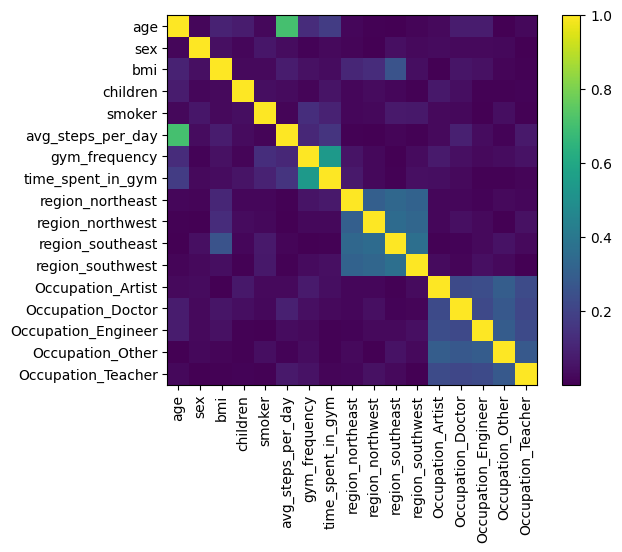

In [17]:
%matplotlib inline

plt.imshow(np.abs(corr_matrix))
plt.colorbar()
plt.xticks(range(X_train_original.shape[1]), X_train_original.columns, rotation=90)
plt.yticks(range(X_train_original.shape[1]), X_train_original.columns)
plt.show()

From the above heatmap, we can see that age and avg_steps_per_day has high multi-collinearity. By dictionary order keeping age and dropping avg_steps_per_day.

#### Question-10

In [18]:
X_train_ols = X_train_scaled_df.drop('avg_steps_per_day', axis = 1)
X_train_ols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1003 non-null   float64
 1   sex                  1003 non-null   float64
 2   bmi                  1003 non-null   float64
 3   children             1003 non-null   float64
 4   smoker               1003 non-null   float64
 5   gym_frequency        1003 non-null   float64
 6   time_spent_in_gym    1003 non-null   float64
 7   region_northeast     1003 non-null   float64
 8   region_northwest     1003 non-null   float64
 9   region_southeast     1003 non-null   float64
 10  region_southwest     1003 non-null   float64
 11  Occupation_Artist    1003 non-null   float64
 12  Occupation_Doctor    1003 non-null   float64
 13  Occupation_Engineer  1003 non-null   float64
 14  Occupation_Other     1003 non-null   float64
 15  Occupation_Teacher   1003 non-null   f

In [19]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

y_train = np.array(y_train).reshape(-1)
X_train_ols = sm.add_constant(X_train_ols)
mlreg_model = sm.OLS(y_train, X_train_ols).fit()
y_pred = mlreg_model.predict(X_train_ols)
r2_squared_ols = r2_score(y_train, y_pred)

In [20]:
r2_squared_ols.round(3)

0.615

#### Question-11

In [21]:
mlreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     112.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.24e-193
Time:                        14:50:09   Log-Likelihood:                -10361.
No. Observations:                1003   AIC:                         2.075e+04
Df Residuals:                     988   BIC:                         2.083e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.531e+04    719.705     21.278      0.000    1.39e+04    1.67e+04
age                  1.052e+04    845.107     12.452      0.000    8864.542    1.22e+04
sex                   265.7971    474.114      0.561      0.575    -664.589    1196.184
bmi                  1.311e+04   1549.041      8.461      0.000    1.01e+04    1.61e+04
children             2376.8959    980.097      2.425      0.015     453.585    4300.207
smoker              -2.182e+04    627.394    -34.781      0.000   -2.31e+04   -2.06e+04
gym_frequency       -1643.2852    779.721     -2.108      0.035   -3173.385    -113.185
time_spent_in_gym   -1328.3592    796.989     -1.667      0.096   -2892.344     235.626
region_northeast     4267.5320    448.121      9.523      0.000    3388.154    5146.910
region_northwest     4034.7006    451.212      8.942      0.000    3149.256    4920.145
region_southeast     3785.0579    465.507      8.131      0.000    2871.562    4698.554
region_southwest     3226.4624    449.957      7.171      0.000    2343.481    4109.444
Occupation_Artist    1939.4102    509.997      3.803      0.000     938.609    2940.212
Occupation_Doctor    2669.1127    528.098      5.054      0.000    1632.790    3705.435
Occupation_Engineer  3389.2422    498.449      6.800      0.000    2411.101    4367.383
Occupation_Other     3439.8072    449.773      7.648      0.000    2557.187    4322.428
Occupation_Teacher   3876.1805    515.836      7.514      0.000    2863.921    4888.440
==============================================================================
Omnibus:                      416.883   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1915.419
Skew:                           1.921   Prob(JB):                         0.00
Kurtosis:                       8.574   Cond. No.                     1.49e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the above summary of the model, we can see the p-values for each column. Based on the default 0.05 significance level, checking for non significant columns with p-value less than 0.05.

Columns 'sex': p-value(0.575) and 'time_spent_in_gym': p-value(0.096) have p-values greater than 0.05. Hence, dropping the three columns.

#### Question-12

In [22]:
cols = ['sex', 'time_spent_in_gym']
X_train_ols.drop(cols, axis = 1, inplace = True)

In [23]:
mlreg_model = sm.OLS(y_train, X_train_ols).fit()
y_pred = mlreg_model.predict(X_train_ols)
r2_squared = r2_score(y_train, y_pred)

In [24]:
r2_squared.round(3)

0.614

In [25]:
mlreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     131.3
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.47e-195
Time:                        14:50:09   Log-Likelihood:                -10363.
No. Observations:                1003   AIC:                         2.075e+04
Df Residuals:                     990   BIC:                         2.082e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.514e+04    678.560     22.305      0.000    1.38e+04    1.65e+04
age                  1.069e+04    838.249     12.758      0.000    9049.068    1.23e+04
bmi                  1.314e+04   1548.896      8.486      0.000    1.01e+04    1.62e+04
children             2486.2390    978.676      2.540      0.011     565.722    4406.756
smoker              -2.188e+04    626.371    -34.926      0.000   -2.31e+04   -2.06e+04
gym_frequency       -2320.8218    667.090     -3.479      0.001   -3629.895   -1011.749
region_northeast     4258.0791    446.281      9.541      0.000    3382.314    5133.845
region_northwest     3980.6110    446.607      8.913      0.000    3104.206    4857.016
region_southeast     3740.6705    460.467      8.124      0.000    2837.067    4644.274
region_southwest     3156.0038    445.432      7.085      0.000    2281.905    4030.103
Occupation_Artist    1906.5932    506.525      3.764      0.000     912.606    2900.580
Occupation_Doctor    2623.9689    526.780      4.981      0.000    1590.235    3657.703
Occupation_Engineer  3349.1645    497.142      6.737      0.000    2373.591    4324.738
Occupation_Other     3422.5037    447.090      7.655      0.000    2545.150    4299.857
Occupation_Teacher   3833.1341    513.656      7.462      0.000    2825.154    4841.115
==============================================================================
Omnibus:                      420.013   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1946.053
Skew:                           1.935   Prob(JB):                         0.00
Kurtosis:                       8.621   Cond. No.                     8.80e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.9e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Question-13

From the plot displaying fitted values vs. residuals, the mean of all residuals is approximately zero.

#### Question 14

Since R-squared value is 0.614, the model explains over 60% of the variance in the dependent variable charges, indicating a relatively strong fit.

The residual plot indicates potential heteroscedasticity, with a spread of residuals that varies with the level of fitted values.

All the predictors included in the model are statistically significant, as suggested by their p-values.


#### Question-15

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_original)
X_test_scaled = scaler.transform(X_test_original)

lregmodel = LinearRegression()
lregmodel.fit(X_train_scaled, y_train)

y_train_pred = lregmodel.predict(X_train_scaled)
r2_mlgr_train = r2_score(y_train, y_train_pred)

In [27]:
round(r2_mlgr_train,2)

0.62

#### Question-16

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

y_test_pred = lregmodel.predict(X_test_scaled)
r2_mlgr_test = r2_score(y_test, y_test_pred)

In [29]:
round(r2_mlgr_test,2)

0.7

#### Question-17

R2 score of the scaled train dataset: 0.62
R2 score of the scaled test dataframe: 0.70

Based on the R2-score computed in the previous two lab questions, this model is a good fit considering the available train and test datasets

#### Question-18

In [30]:
from sklearn.linear_model import SGDRegressor

max_iter_values = [15, 20, 50, 100]
for max_iter in max_iter_values:
    sgd = SGDRegressor(random_state=0, max_iter=max_iter)
    sgd.fit(X_train_scaled, y_train)
    
    print("Maximum Iterations: ", max_iter)
    print("Train R-squared-value: ", sgd.score(X_train_scaled, y_train).round(3))
    print("Test R-squared-value: ", sgd.score(X_test_scaled, y_test).round(3))
    print('-'*30)

Maximum Iterations:  15
Train R-squared-value:  0.591
Test R-squared-value:  0.661
------------------------------
Maximum Iterations:  20
Train R-squared-value:  0.602
Test R-squared-value:  0.676
------------------------------
Maximum Iterations:  50
Train R-squared-value:  0.612
Test R-squared-value:  0.693
------------------------------
Maximum Iterations:  100
Train R-squared-value:  0.614
Test R-squared-value:  0.696
------------------------------


The performance of the SGDRegressor machine learning model improves as the value of the max_iter parameter is increased(from 15 to 100) during training.
The SGDRegressor model complexity increases while we are increasing the max_iter.
Increase in computational complexity, as more iterations generally require more computations.

#### Question-19

In [31]:
from sklearn.linear_model import SGDRegressor

learning_rate_options = ['constant', 'optimal', 'invscaling', 'adaptive']

for learning_rate in learning_rate_options:
  if learning_rate == 'optimal':
    sgd = SGDRegressor(random_state=0, max_iter=1000, learning_rate=learning_rate, alpha=0.2)
  else:
    sgd = SGDRegressor(random_state=0, max_iter=1000, learning_rate=learning_rate, eta0=0.2)
  sgd.fit(X_train_scaled, y_train)

  print(f'Learning Rate: {learning_rate}')
  print('Train R-squared-value: ', sgd.score(X_train_scaled, y_train))
  print('Test R-squared-value: ', sgd.score(X_test_scaled, y_test))
  print('-'*50)

Learning Rate: constant
Train R-squared-value:  0.19882164139058478
Test R-squared-value:  0.33946134685353035
--------------------------------------------------
Learning Rate: optimal
Train R-squared-value:  0.3946999193804699
Test R-squared-value:  0.42170382413697327
--------------------------------------------------
Learning Rate: invscaling
Train R-squared-value:  0.6130723727562541
Test R-squared-value:  0.6942736922044577
--------------------------------------------------
Learning Rate: adaptive
Train R-squared-value:  0.6173757314736862
Test R-squared-value:  0.7024001346521549
--------------------------------------------------


Learning Rate: 'constant', eta0 = 0.2:
Train R2-score: 0.1988, Validation R2-score: 0.3395

Learning Rate: 'optimal', alpha = 0.2:
Train R2-score: 0.3947, Validation R2-score: 0.4217

Learning Rate: 'invscaling', eta0 = 0.2:
Train R2-score: 0.6131, Validation R2-score: 0.6943

Learning Rate: 'adaptive', eta0 = 0.2:
Train R2-score: 0.6174, Validation R2-score: 0.7024

adaptive learning rate strategy with eta0 = 0.2 is the most effective